# OSNACA exploratory data analysis

- Stands for Ore Samples Normalised to Average Crustal Abundance
- Includes 62 ore, pathfinder, major and lithogeochemical elements
- No dates for sample collections - says 2011 onwards on https://aus01.safelinks.protection.outlook.com/?url=http%3A%2F%2Fwww.cet.edu.au%2Fresearch-projects%2Fspecial-projects%2Fprojects%2Fosnaca-ore-samples-normalised-to-average-crustal-abundance&data=04%7C01%7C21456546%40student.uwa.edu.au%7C5d0b26557e09433fb7a108d956389098%7C05894af0cb2846d8871674cdb46e2226%7C1%7C0%7C637635623274982812%7CUnknown%7CTWFpbGZsb3d8eyJWIjoiMC4wLjAwMDAiLCJQIjoiV2luMzIiLCJBTiI6Ik1haWwiLCJXVCI6Mn0%3D%7C1000&sdata=jSiZSJixoDiRRuyTUrhYBB4wLKU1RJSNJA3ka0o2vII%3D&reserved=0

## Read data and metadata

In [4]:
import pandas as pd

In [5]:
osnaca = pd.read_excel("osnaca-data.xlsx",sheet_name="Data")
osnaca_conclurry = pd.read_excel("osnaca-data.xlsx",sheet_name="Cloncurry Supplement")
osnaca_metadata_sheet1 = pd.read_excel("osnaca-metadata.xlsx",sheet_name="Ore samples")

## Metadata useful information

- Data was collected in 58 countries. 
- Most samples were collected in Australia, then USA, Canada, China and South Africa. 

In [6]:
osnaca_metadata_sheet1['Country'].nunique()

58

In [20]:
osnaca_metadata_sheet1['Country'].value_counts()

Australia             536
USA                    74
Canada                 74
China                  38
South Africa           36
Russia                 23
Japan                  21
Indonesia              17
Papua New Guinea       16
Brazil                 16
Zambia                 15
New Zealand            14
Austraila              13
Philippines            13
India                  12
Myanmar                12
DRC                    11
Laos                   10
Chile                   9
Guinea                  9
Ireland                 9
Mali                    8
Thailand                8
Namibia                 8
Germany                 7
Austria                 7
Vietnam                 7
Zimbabwe                6
Portugal                6
Tunisia                 5
Turkey                  5
Poland                  4
Ghana                   4
Finland                 4
Spain                   4
Pakistan                3
Egypt                   3
Peru                    3
Bulgaria    

- 16 classes of deposits
- More of orogenic, VHMS, sediment hosted Pd-Zn types, Epithermal. 

In [24]:
osnaca_metadata_sheet1['Class'].nunique()

16

In [25]:
osnaca_metadata_sheet1['Class'].value_counts()

Orogenic - Intrusion Related Au    332
VHMS                               134
Sediment Hosted Pb-Zn              115
Epithermal                         109
IOCG                                61
Porphyry                            58
Magmatic Ni-Cu-PGE                  53
Skarn                               51
Other                               50
Sediment Hosted Cu                  40
Granite Related                     35
Fe                                  21
Carlin Au                           20
Layered Intrusion Cr-PGE-V          12
Uranium                              8
Podiform Cr                          1
Name: Class, dtype: int64

## Prepare dataset

In [8]:
osnaca.head() #first lines

,Sample,Code,Au (FA),Pt,Pd,Au (AR),Bi,Te,Hg,Ag,...,Y,Zn,B,Hf,Si,Zr,Be,Ga,Ge,Wt Tot
0,700001,NaN,0.438,0.002,0.002,0.362,10.60,0.02,0.39,91.5,...,1.2,153000,-20,0.4,34200,60,-1.0,11.0,1,159
1,700002,NaN,0.093,0.001,0.002,0.095,125.00,0.22,0.12,44.0,...,18.5,3780,-20,0.2,114000,20,-1.0,2.0,-1,143
2,700003,NaN,1.41,0.002,0.002,1.39,120.00,0.02,62.9,215.0,...,0.3,219000,-20,-0.2,71500,-10,-1.0,-1.0,2,204
3,700004,1,0.096,0.003,0.005,0.086,0.72,0.80,0.03,2.5,...,6.3,755,-20,2.0,244000,70,-1.0,-1.0,-1,185
4,700005,NaN,2.9,0.003,0.005,3.94,0.34,0.06,4.01,162.0,...,4.5,173000,-20,-0.2,142000,-10,-1.0,-1.0,2,280


In [26]:
osnaca_conclurry.head()

,Sample,Code,Code Tester,Au1,Pt,Pd,Au(AR),Bi,Te,Hg,...,Y,Zn,B,Hf,Si,Zr,Be,Ga,Ge,Wt Total
0,ALT010,NaN,NaN,0.039,0.002,-0.001,NaN,1.20,0.44,12.80,...,7.1,6760,-20,1.2,91800,40,4.2,16.6,4,164.0
1,ALT024,NaN,NaN,0.011,-0.001,0.002,NaN,0.20,0.10,0.02,...,14.6,1390,-20,22.0,64300,900,12.2,25.8,3,140.0
2,ALT073,NaN,NaN,0.436,0.004,0.007,NaN,0.30,0.22,1.30,...,15.1,1510,-20,2.0,127000,70,17.0,32.4,12,109.0
3,ALT074,NaN,NaN,0.508,0.002,0.002,NaN,24.70,1.80,3.91,...,3.6,14500,20,0.4,40300,4,0.9,5.6,1,NaN
4,ART013,1.0,1.0,-0.001,0.001,-0.001,NaN,0.08,-0.02,-0.01,...,41.0,225,80,5.6,248000,156,6.0,33.4,1,NaN


In [9]:
osnaca.info() #1139 rows, 69 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 69 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sample   1139 non-null   int64  
 1   Code     202 non-null    object 
 2   Au (FA)  1139 non-null   object 
 3   Pt       1139 non-null   object 
 4   Pd       1139 non-null   object 
 5   Au (AR)  1139 non-null   object 
 6   Bi       1139 non-null   float64
 7   Te       1139 non-null   float64
 8   Hg       1139 non-null   object 
 9   Ag       1139 non-null   float64
 10  Al       1139 non-null   int64  
 11  As       1139 non-null   int64  
 12  Ca       1139 non-null   int64  
 13  Cd       1139 non-null   float64
 14  Co       1139 non-null   int64  
 15  Cr       1139 non-null   int64  
 16  Cs       1139 non-null   float64
 17  Cu       1139 non-null   int64  
 18  Fe       1139 non-null   int64  
 19  In       1139 non-null   float64
 20  K        1139 non-null   int64  
 21  La       1139 

In [28]:
osnaca_conclurry.info() #72 rows, 70 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 70 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sample       72 non-null     object 
 1   Code         15 non-null     float64
 2   Code Tester  15 non-null     float64
 3   Au1          72 non-null     float64
 4   Pt           72 non-null     float64
 5   Pd           72 non-null     float64
 6   Au(AR)       0 non-null      float64
 7   Bi           72 non-null     float64
 8   Te           72 non-null     float64
 9   Hg           72 non-null     float64
 10  Ag           72 non-null     float64
 11  Al           72 non-null     int64  
 12  As           72 non-null     int64  
 13  Ca           72 non-null     int64  
 14  Cd           72 non-null     float64
 15  Co           72 non-null     int64  
 16  Cr           72 non-null     int64  
 17  Cs           72 non-null     float64
 18  Cu           72 non-null     int64  
 19  Fe        

### Merge two first sheets

In [7]:
set(osnaca.columns).difference(set(osnaca_conclurry.columns))

{'Au (AR)', 'Au (FA)', 'Wt Tot'}

In [8]:
set(osnaca_conclurry.columns).difference(set(osnaca.columns))

{'Au(AR)', 'Au1', 'Code Tester', 'Wt Total'}

In [9]:
#assumed Au1 = Au (FA)
osnaca_cloncurry = osnaca_conclurry.rename(columns={"Wt Total": "Wt Tot", "Au(AR)": "Au (AR)", "Au1": "Au (FA)"})
osnaca_cloncurry = osnaca_cloncurry.drop(['Code Tester'], axis = 1)

In [10]:
#merge the Cloncurry data with the other samples
osnaca_all = pd.concat([osnaca, osnaca_cloncurry])

### Nulls

In [50]:
#we're not worried about these columns so should be okay for now
osnaca_all.isna().sum()[osnaca_all.isna().sum() > 0]

Code       994
Au (AR)     72
Wt Tot     617
dtype: int64

In [51]:
osnaca_all.isna().sum().sum()

1683

### Minerals of interest: 

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

- Germanium (Ge) and indium (In) associated with zinc (Zn) (or copper) in so-called volcanogenic massive sulphide (VMS) deposits
- Cobalt (Co) associated with nickel (Ni) (and copper) (Cu) in so-called orthomagmatic (igneous) mafic to ultramafic volcanic (komatiite)-hosted and intrusion-hosted deposits

In [84]:
osnaca_all[['Ge', 'In', 'Co','Zn', 'Cu', 'Ni']].corr()

,Ge,In,Co,Zn,Cu,Ni
Ge,1.000000,-0.003387,-0.040505,0.496282,-0.048298,-0.027769
In,-0.003387,1.000000,0.009897,0.084367,0.157200,-0.028306
Co,-0.040505,0.009897,1.000000,-0.064001,0.065329,0.259981
Zn,0.496282,0.084367,-0.064001,1.000000,-0.081291,-0.067325
Cu,-0.048298,0.157200,0.065329,-0.081291,1.000000,-0.032779
Ni,-0.027769,-0.028306,0.259981,-0.067325,-0.032779,1.000000


- Seems like Ge and Zn almost 50% correlated, but negatively correlated 4% with Cu
- In more correlated to Cu than Zn (15% as opposed to 8%)
- Co 6% with Cu and 25% with Ni. 

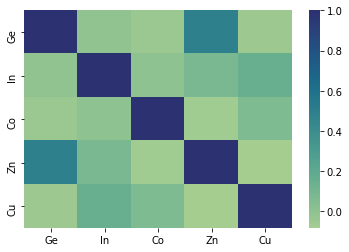

In [65]:
sns.heatmap(osnaca_all[['Ge', 'In', 'Co', 'Zn', 'Cu']].corr(), cmap='crest');

In [86]:
osnaca_all.corr()['In'].sort_values(ascending=False)

In    1.000000
S     0.223320
Cu    0.157200
Se    0.135589
Fe    0.123512
        ...   
Sc   -0.083229
K    -0.085101
Ti   -0.087413
Al   -0.103199
Si   -0.141547
Name: In, Length: 61, dtype: float64

In [87]:
osnaca_all.corr()['Ge'].sort_values(ascending=False)

Ge    1.000000
Zn    0.496282
Cd    0.226739
S     0.198342
Tl    0.179400
        ...   
K    -0.095798
Na   -0.102637
Ti   -0.116100
Al   -0.139017
Si   -0.185344
Name: Ge, Length: 61, dtype: float64

In [88]:
osnaca_all.corr()['Co'].sort_values(ascending=False)

Co    1.000000
Ni    0.259981
Fe    0.170675
S     0.165500
Cu    0.065329
        ...   
Ti   -0.062055
Zn   -0.064001
Na   -0.074630
Al   -0.097120
Si   -0.110992
Name: Co, Length: 61, dtype: float64

- Indium: sulfur is more corr
- Ge: Zn is more corr
- Co: Ni is more corr
- Negative correlations are never very high

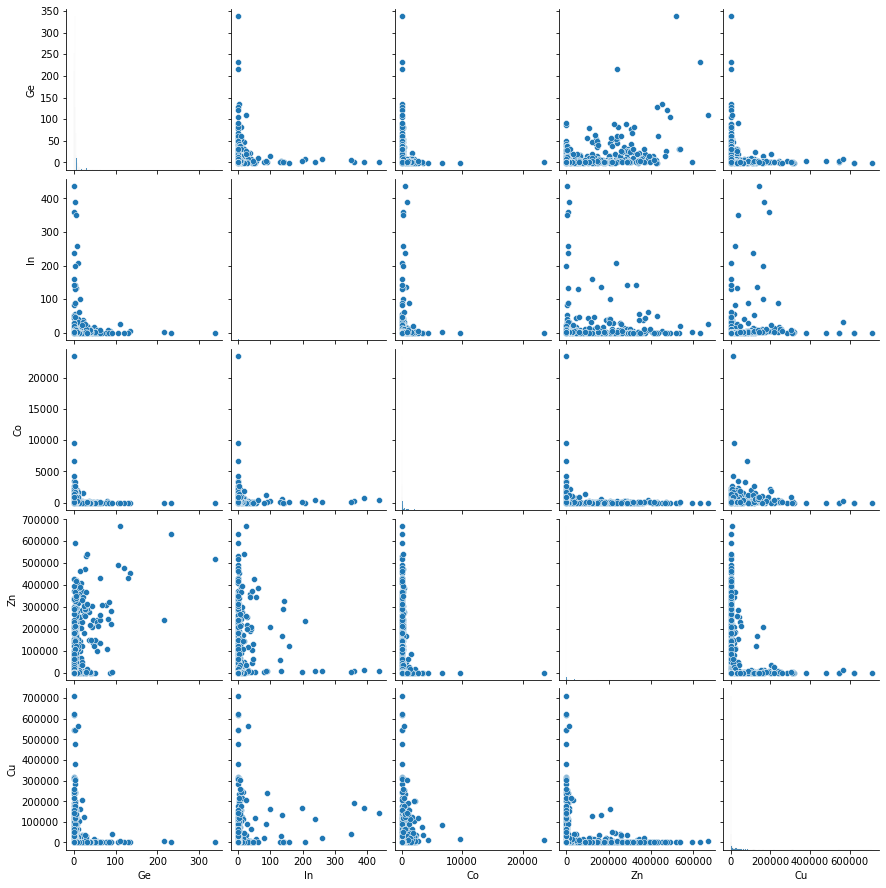

In [13]:
sns.pairplot(osnaca_all[['Ge', 'In', 'Co', 'Zn', 'Cu']]);